In [1]:
from ALLCools.mcds import MCDS
import pandas as pd
import anndata
from scipy.sparse import csr_matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mcds_paths = './genebody_frac.mcds/'
cell_meta_path = 'L1_clustering_labels.csv'
cluster_col = 'L1'

obs_dim = 'cell'
var_dim = 'genebody'
mc_type = 'CGN'

In [4]:
cell_metaa = pd.read_csv('metadata_allco.csv', sep=',', index_col=0)



cell_metaa['AnimalID'] = cell_metaa['Animal ID'] 
cell_metaa = cell_metaa[cell_metaa['Type'] == "EO"]
cell_metaa

,Animal ID,Group,Sample Name,Type,# Read,% mCpG,Group.1,Path,AnimalID
SampleID,,,,,,,,,
4520845054EO2NC8E7S,45208,Stressed,45208_45054_EO2_NC8_E7_1_val_1,EO,600000,0.709,Stressed,mv 45208_45054_EO2_NC8_E7_1_val_1_bismark_bt2_...,45208
4247345061EO1NC8O4S,42473,Stressed,42473_45061_EO1_NC8_O4_1_val_1,EO,1500000,0.670,Stressed,mv 42473_45061_EO1_NC8_O4_1_val_1_bismark_bt2_...,42473
4520845054EO3NC8F7S,45208,Stressed,45208_45054_EO3_NC8_F7_1_val_1,EO,1800000,0.724,Stressed,mv 45208_45054_EO3_NC8_F7_1_val_1_bismark_bt2_...,45208
4305145068EO1NC8M5S,43051,Stressed,43051_45068_EO1_NC8_M5_1_val_1,EO,2100000,0.671,Stressed,mv 43051_45068_EO1_NC8_M5_1_val_1_bismark_bt2_...,43051
4211145019EOoNC8M4C,42111,Control,42111_45019_EOo_NC8_M4_1_val_1,EO,4800000,0.488,Control,mv 42111_45019_EOo_NC8_M4_1_val_1_bismark_bt2_...,42111
4520845054EO5NC8H7S,45208,Stressed,45208_45054_EO5_NC8_H7_1_val_1,EO,5900000,0.638,Stressed,mv 45208_45054_EO5_NC8_H7_1_val_1_bismark_bt2_...,45208
4305145068EO3NC8O5S,43051,Stressed,43051_45068_EO3_NC8_O5_1_val_1,EO,6100000,0.718,Stressed,mv 43051_45068_EO3_NC8_O5_1_val_1_bismark_bt2_...,43051
4129945019EO6NC8H2S,41299,Stressed,41299_45019_EO6_NC8_H2_1_val_1,EO,7200000,0.699,Stressed,mv 41299_45019_EO6_NC8_H2_1_val_1_bismark_bt2_...,41299
4520845054EO4NC8G7S,45208,Stressed,45208_45054_EO4_NC8_G7_1_val_1,EO,8600000,0.502,Stressed,mv 45208_45054_EO4_NC8_G7_1_val_1_bismark_bt2_...,45208


gene_meta = pd.read_csv('../../GeneMetadata_withGeneName_corrected.csv')
gene_meta["Gene"] = gene_meta["gene_id"]
gene_meta

In [5]:
mcds = MCDS.open(mcds_paths)
mcds['cell'].values


array(['4129945019EO2NC8D2S', '4129945019EO3NC8E2S',
       '4129945019EO4NC8F2S', '4129945019EO5NC8G2S',
       '4129945019EO6NC8H2S', '4129945019EO8NC8J2S',
       '4211145019EOoNC8M4C', '4247345061EO1NC8O4S',
       '4305145068EO1NC8M5S', '4305145068EO3NC8O5S',
       '4520845054BL2NC16J7S', '4520845054BL3NC16K7S',
       '4520845054BL4NC16L7S', '4520845054BL5NC16M7S',
       '4520845054BL6NC16N7S', '4520845054EO1NC8D7S',
       '4520845054EO2NC8E7S', '4520845054EO3NC8F7S',
       '4520845054EO4NC8G7S', '4520845054EO5NC8H7S'], dtype='<U20')

In [6]:
    # Filter metadata to ensure cells align with MCDS cells
cell_meta = cell_metaa[cell_metaa.index.isin(mcds['cell'].values)]
mcds = mcds.sel(cell=cell_meta.index)
cell_meta.index

Index(['4520845054EO2NC8E7S', '4247345061EO1NC8O4S', '4520845054EO3NC8F7S',
       '4305145068EO1NC8M5S', '4211145019EOoNC8M4C', '4520845054EO5NC8H7S',
       '4305145068EO3NC8O5S', '4129945019EO6NC8H2S', '4520845054EO4NC8G7S',
       '4520845054EO1NC8D7S', '4129945019EO8NC8J2S', '4129945019EO5NC8G2S',
       '4129945019EO2NC8D2S', '4129945019EO4NC8F2S', '4129945019EO3NC8E2S'],
      dtype='object', name='SampleID')

In [7]:


def convert_mcds_to_anndata(mcds_path, cell_meta, mc_type='CGN'):
    # Load the MCDS data and metadata
    mcds = MCDS.open(mcds_paths)

    
    # Filter metadata to ensure cells align with MCDS cells
    cell_meta = cell_metaa[cell_metaa.index.isin(mcds['cell'].values)]
    mcds = mcds.sel(cell=cell_meta.index)
    
    # Extract methylation fraction data directly from `genebody_da_frac`
    methylation_data = mcds['genebody_da_frac'].sel(mc_type=mc_type).values

    # Convert methylation data to a sparse matrix to save memory
    methylation_data = csr_matrix(methylation_data)

    # Create AnnData with methylation fraction matrix as `X`
    adata = anndata.AnnData(X=methylation_data)
    
    # Set cell-level metadata
    adata.obs = cell_meta
    
    # Set gene-level metadata
    adata.var = pd.DataFrame({
        'gene_id': mcds['genebody'].values,
        'chrom': mcds['genebody_chrom'].values,
        'start': mcds['genebody_start'].values,
        'end': mcds['genebody_end'].values
    }, index=mcds['genebody'].values)
    
    # Optionally, add the methylation fraction as a layer if needed for future analysis
    adata.layers['methylation_fraction'] = methylation_data

    return adata



In [8]:
#Convert MCDS to AnnData
adata = convert_mcds_to_anndata(mcds_paths, cell_metaa, mc_type='CGN')
adata.write_h5ad("embryo-only/adataFromgenebodyFrac_mCG_Embryoonly.h5ad")
adata.obs_names

Index(['4520845054EO2NC8E7S', '4247345061EO1NC8O4S', '4520845054EO3NC8F7S',
       '4305145068EO1NC8M5S', '4211145019EOoNC8M4C', '4520845054EO5NC8H7S',
       '4305145068EO3NC8O5S', '4129945019EO6NC8H2S', '4520845054EO4NC8G7S',
       '4520845054EO1NC8D7S', '4129945019EO8NC8J2S', '4129945019EO5NC8G2S',
       '4129945019EO2NC8D2S', '4129945019EO4NC8F2S', '4129945019EO3NC8E2S'],
      dtype='object', name='SampleID')

In [9]:
adata.obs_names = adata.obs_names.astype(str)


In [10]:
adataembryo = adata
adataembryo.obs_names

Index(['4520845054EO2NC8E7S', '4247345061EO1NC8O4S', '4520845054EO3NC8F7S',
       '4305145068EO1NC8M5S', '4211145019EOoNC8M4C', '4520845054EO5NC8H7S',
       '4305145068EO3NC8O5S', '4129945019EO6NC8H2S', '4520845054EO4NC8G7S',
       '4520845054EO1NC8D7S', '4129945019EO8NC8J2S', '4129945019EO5NC8G2S',
       '4129945019EO2NC8D2S', '4129945019EO4NC8F2S', '4129945019EO3NC8E2S'],
      dtype='object', name='SampleID')

In [11]:
adataoocyte = anndata.read_h5ad("../../alloocytes/results-pooled/hdWGBS/adataFromgenebodyFrac_mCG.h5ad")
adataoocyte.obs_names

Index(['4146045001PO3NC4G4C', '4129944963PO2NC4M1S', '4520844650PO1NC5A7S',
       '4146045001PO2NC3F4C', '4520844650PO2NC3B7S', '3905345005PO1NC2I1S',
       '4129944963PO1NC3N1S', '4211144957PO1NC3K4C', '4660644938PO2NC3A10C',
       '4139144923PO4NC4K3C', '4598244908PO1NC3J8C', '4598244908PO2NC4K8C',
       '4566944964PO2NC4C7C', '4129944963PO3NC3O1S', '4139144923PO3NC5J3C',
       '4566944964PO3NC3D8C', '4265145042PO3NC4G5S', '4598245001PO2NC4F8C',
       '4499445005PO2NC3C5C', '4660644993PO2NC5D10C', '4566944964PO4NC3E8C',
       '4660644938PO3NC5B10C', '4636344664PO1NC5L9C', '4566944700PO1NC5O8C',
       '4636344914PO1NC4H9C', '4265145042PO2NC4N4S', '4660644993PO3NC5E10C',
       '4211144957PO2NC3L4C', '3889744700PO1NC5D1S', '4265145042PO1NC3E5S',
       '4660644993PO4NC5F10C', '4146044643PO3NC5A4C', '4146045001PO1NC5E4C',
       '4139144650PO1NC4F3C', '4139144650PO2NC4G3C', '4520844650PO3NC5C8S',
       '4566944700PO2NC5P8C', '4146044643PO1NC5O3C', '4456444991PO1NC3H6C',
       

In [12]:
adataembryo.layers['methylation_fraction'].data


array([1.251523  , 1.2453799 , 1.1828555 , ..., 0.42035067, 1.1652611 ,
       1.        ], dtype=float32)

/tmp/ipykernel_936713/2960128200.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


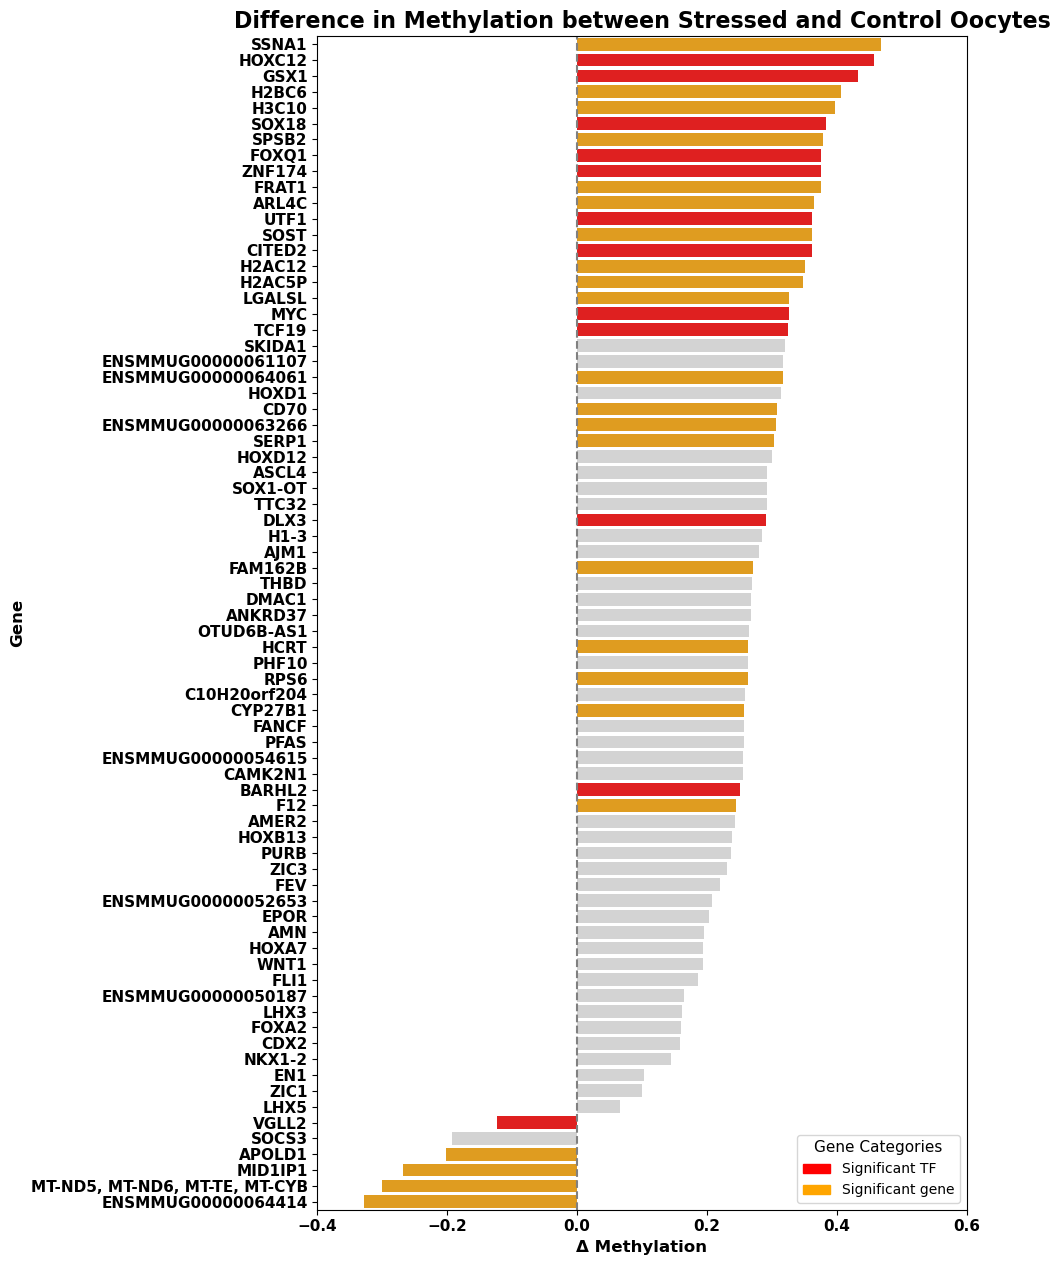

In [13]:
# ── Compare Control vs Stressed Oocytes – Δ Methylation per Gene ──

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# ── Step 1: Define transcription factors ──
highlight_tfs = [
    'BARHL2', 'FOXA2', 'SOX18', 'HOXC12', 'ASCL4', 'LHX5', 'EN1', 
    'HOXD12', 'HOXD1', 'FEV', 'LHX3', 'DLX3', 'HOXB13', 'GSX1', 
    'CDX2', 'ZIC1', 'ZNF174', 'PURB', 'HOXA7', 'VGLL2', 'CITED2', 
    'TCF19', 'FOXQ1', 'MYC', 'NKX1-2', 'FLI1', 'UTF1', 'ZIC3'
]

# ── Step 2: Load gene list ──
genes_df = pd.read_csv("../../alloocytes/results-pooled/mCG_genenames_coords_withlifted.csv")
genes_df.columns = ["gene_id", "chr", "start", "end", "genename"]
target_genes = genes_df['gene_id'].dropna().unique()
gene_id_to_name = genes_df.dropna(subset=['genename']).set_index("gene_id")["genename"].to_dict()

# ── Step 3: Filter control and stressed oocytes ──
adata_oocyte_control = adataoocyte[adataoocyte.obs['Group'] == 'Control'].copy()
adata_oocyte_stressed = adataoocyte[adataoocyte.obs['Group'] == 'Stressed'].copy()

# ── Step 4: Filter to target genes ──
adata_oocyte_control = adata_oocyte_control[:, adata_oocyte_control.var['gene_id'].isin(target_genes)].copy()
adata_oocyte_stressed = adata_oocyte_stressed[:, adata_oocyte_stressed.var['gene_id'].isin(target_genes)].copy()

# ── Step 5: Align genes ──
oocyte_var = adata_oocyte_control.var.set_index("gene_id")
stressed_var = adata_oocyte_stressed.var.set_index("gene_id")
common_gene_ids = np.intersect1d(oocyte_var.index, stressed_var.index)

adata_oocyte_control = adata_oocyte_control[:, oocyte_var.loc[common_gene_ids].index]
adata_oocyte_stressed = adata_oocyte_stressed[:, stressed_var.loc[common_gene_ids].index]

# ── Step 6: Compute mean methylation ──
def mean_meth(adata):
    X = adata.layers['methylation_fraction']
    return np.ravel(X.mean(axis=0).A1 if hasattr(X, "A1") else X.mean(axis=0))

control_means = mean_meth(adata_oocyte_control)
stressed_means = mean_meth(adata_oocyte_stressed)



# ── Step 7: Build DataFrame ──
meth_df = pd.DataFrame({
    'gene_id': common_gene_ids,
    'genename': [gene_id_to_name.get(gid, gid) for gid in common_gene_ids],
    'control_mean': control_means,
    'stressed_mean': stressed_means
})
meth_df['delta'] = meth_df['stressed_mean'] - meth_df['control_mean']

# ── Step 8: Highlight TFs ──
highlight_tfs_set = set(highlight_tfs)
meth_df['is_tf'] = meth_df['genename'].isin(highlight_tfs_set)

# ── Step 9: T-test and FDR ──
X_control = adata_oocyte_control.layers['methylation_fraction']
X_stressed = adata_oocyte_stressed.layers['methylation_fraction']
X_control = X_control.toarray() if hasattr(X_control, 'toarray') else X_control
X_stressed = X_stressed.toarray() if hasattr(X_stressed, 'toarray') else X_stressed

pvals = []
for i in range(X_control.shape[1]):
    _, pval = ttest_ind(X_stressed[:, i], X_control[:, i], equal_var=False)
    pvals.append(pval)

meth_df['pval'] = pvals
meth_df['fdr'] = multipletests(meth_df['pval'], method='fdr_bh')[1]
meth_df['significant'] = (meth_df['fdr'] < 0.05) & (meth_df['delta'].abs() > 0.05)

# ── Step 10: Save results ──
meth_df.sort_values('delta', ascending=False, inplace=True)
os.makedirs("figure6/oocytes/", exist_ok=True)
meth_df.to_csv("figure6/oocytes/control_vs_stressed_oocytes_delta_with_stats.csv", index=False)
meth_df[meth_df['significant']].to_csv("figure6/oocytes/control_vs_stressed_oocytes_significant_delta_genes.csv", index=False)
# Keep only rows that are either TFs or significant
filtered_df = meth_df[(meth_df['significant']) | (meth_df['is_tf'])]

# ── Step 11: Plot ──
plt.figure(figsize=(10, max(6, 0.25 * len(filtered_df))))


colors = []
for _, row in meth_df.iterrows():
    if row['significant'] and row['is_tf']:
        colors.append('red')
    #elif row['is_tf']:
    #    colors.append('blue')
    elif row['significant']:
        colors.append('orange')
    else:
        colors.append('lightgray')

sns.barplot(
    data=meth_df,
    x='delta',
    y='genename',
    palette=colors,
    dodge=False
)

legend_patches = [
    mpatches.Patch(color='red', label='Significant TF'),
    #mpatches.Patch(color='blue', label='TF (not significant)'),
    mpatches.Patch(color='orange', label='Significant gene')
    #mpatches.Patch(color='lightgray', label='Other gene')
]
plt.legend(handles=legend_patches, title="Gene Categories", fontsize=10, title_fontsize=11, loc='lower right')
plt.axvline(0, linestyle='--', color='gray')
plt.title("Difference in Methylation between Stressed and Control Oocytes", fontsize=16, fontweight='bold')
plt.xlabel("Δ Methylation", fontsize=12, fontweight='bold')
plt.ylabel("Gene", fontsize=12, fontweight='bold')
plt.xlim(-0.4, 0.6)
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.tight_layout()

os.makedirs("figure6/oocytes", exist_ok=True)
plt.savefig("figure6/oocytes/control_vs_stressed_oocytes_delta_methylation_barplot_significant.png", dpi=300)
plt.show()


In [14]:
# ── 1) Load your “gene of interest” list ──
genes_df = pd.read_csv("../../alloocytes/results-pooled/mCG_genenames_coords_withlifted.csv", sep=",")

# View original column names to rename them correctly
print(genes_df.columns.tolist())

# Then rename if needed
genes_df.columns = ["gene_id", "chr", "start", "end", "genename"]

# Check result
genes_df.head()

['ENSMMUG00000053525', 'chr1', '100564811', '100569887', 'MCL1']


,gene_id,chr,start,end,genename
0,ENSMMUG00000054615,chr1,101331787,101333472,NaN
1,ENSMMUG00000053737,chr1,133742526,133752842,BARHL2
2,ENSMMUG00000063102,chr1,204242900,204245913,CAMK2N1
3,ENSMMUG00000016814,chr10,43467723,43471378,THBD
4,ENSMMUG00000010410,chr10,43927729,43933713,FOXA2


/tmp/ipykernel_936713/2342110774.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


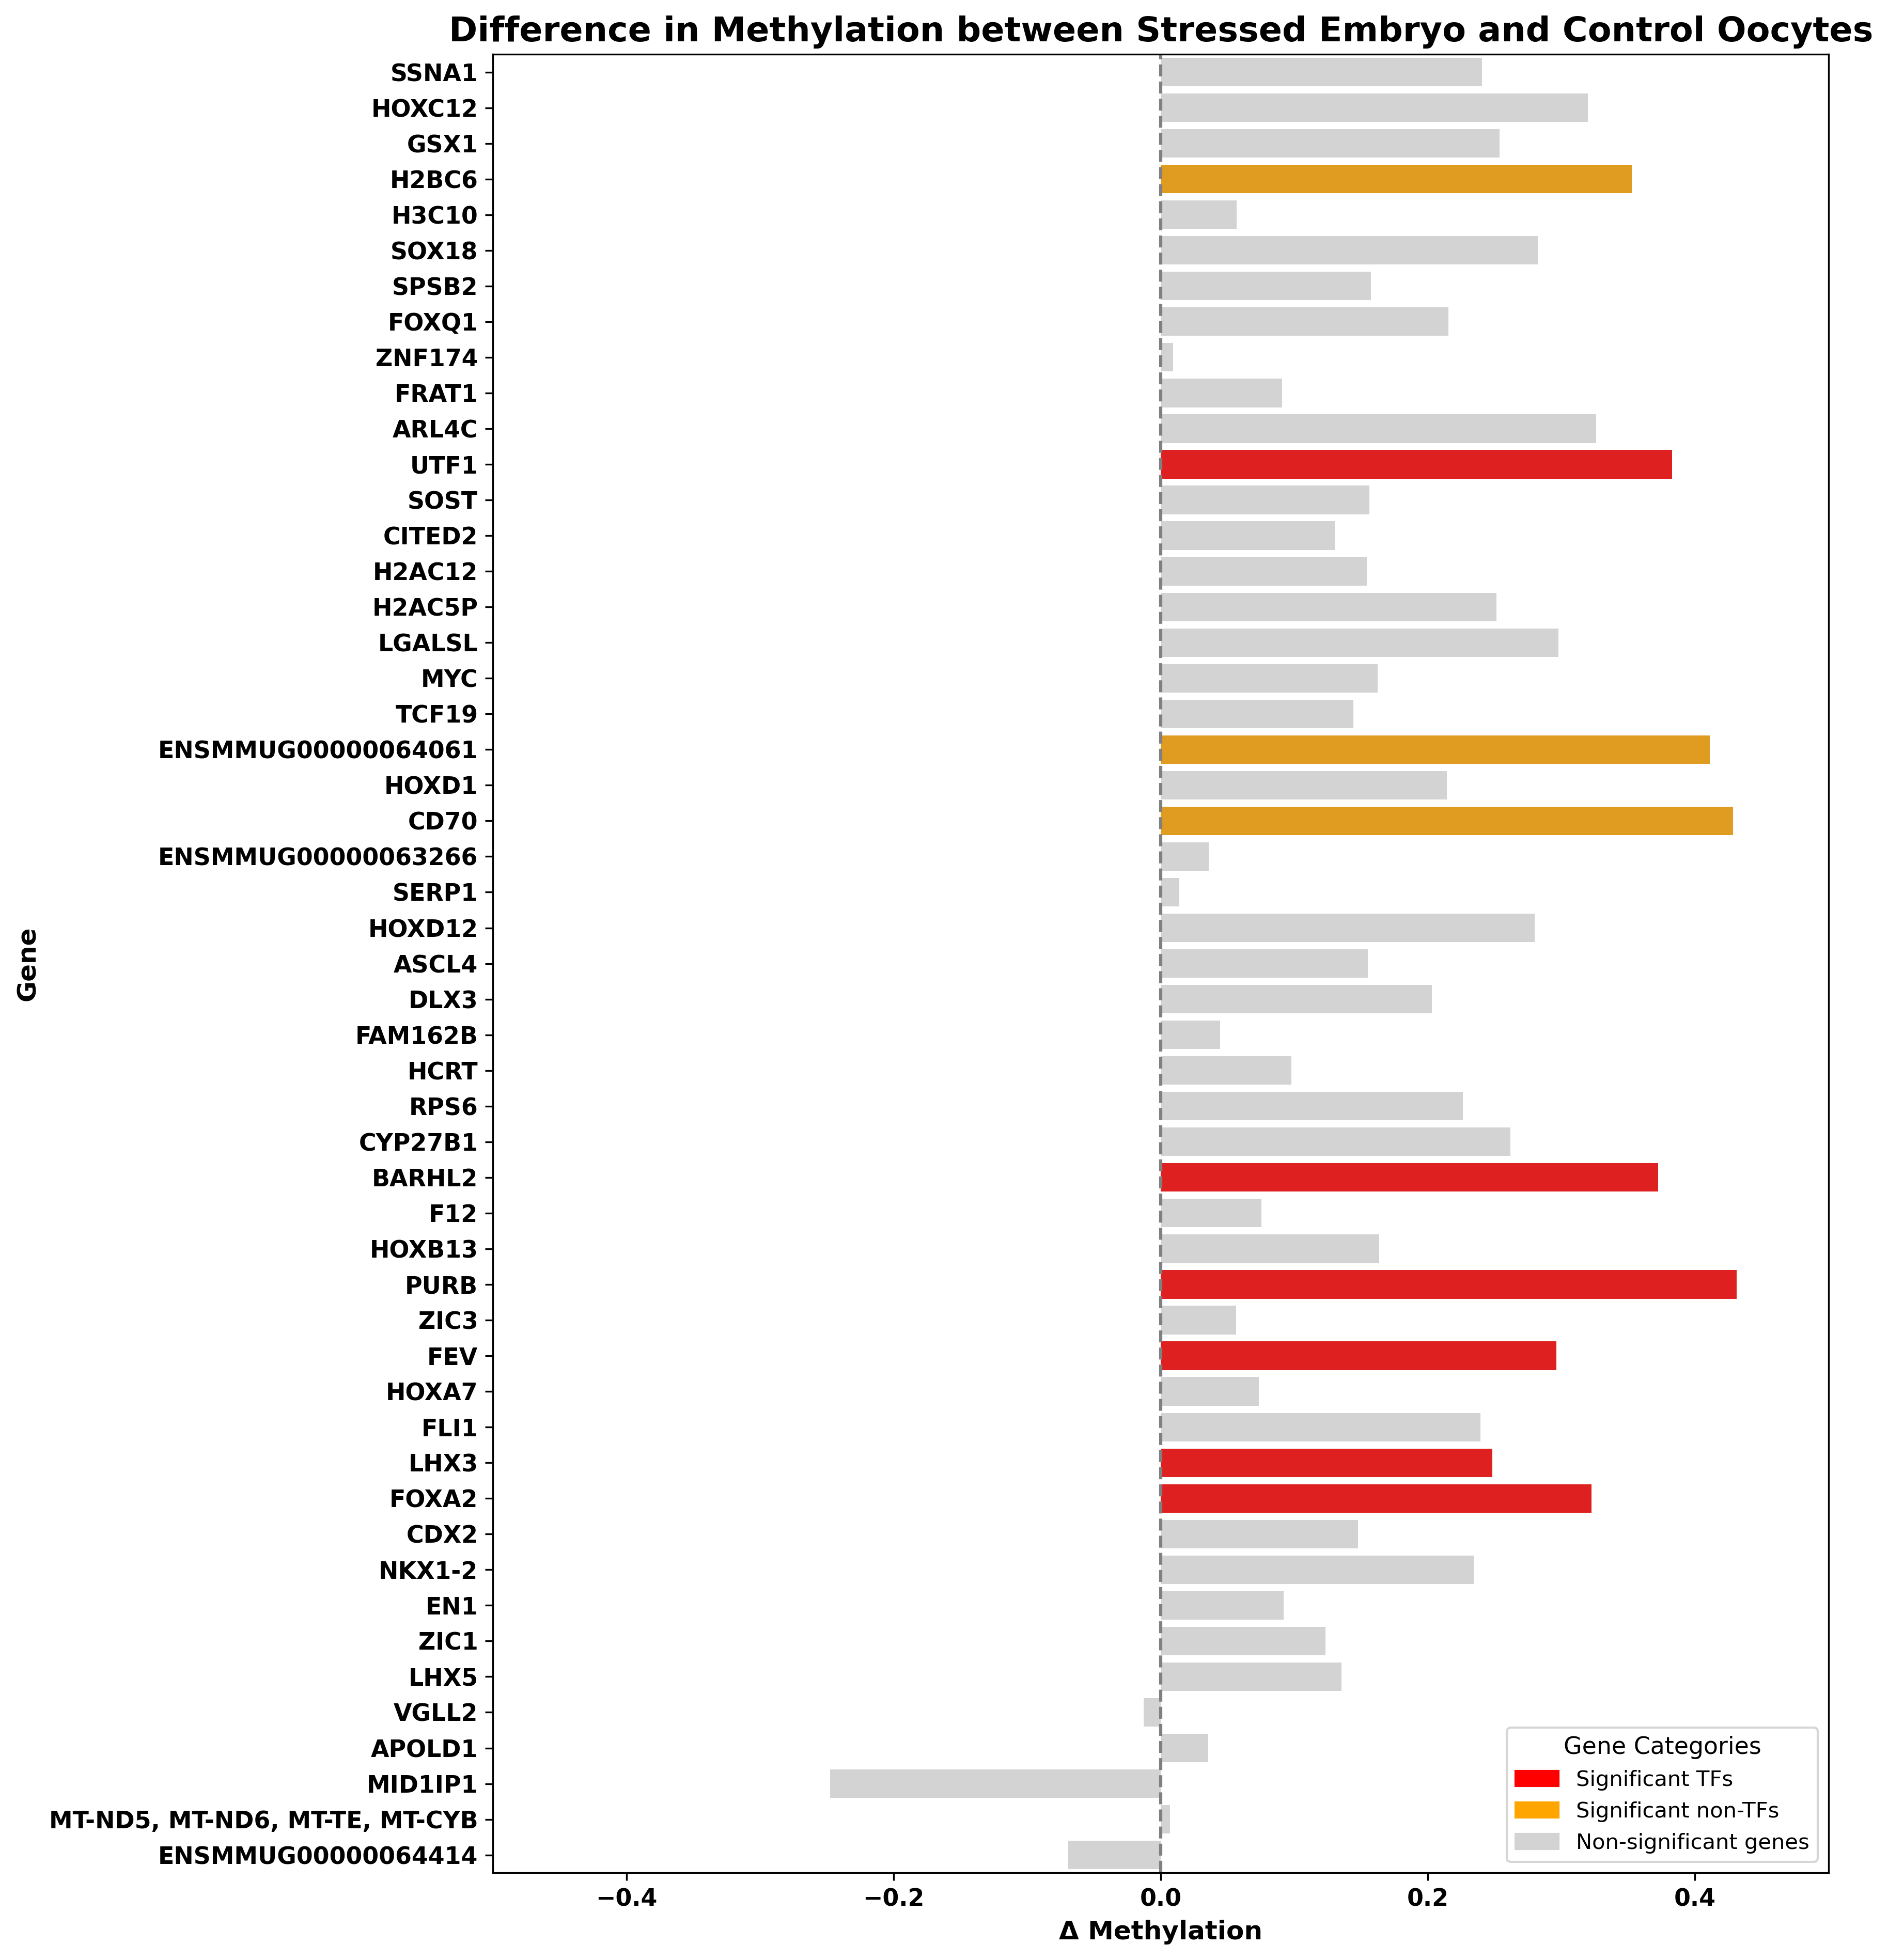

In [15]:
# with pvaue 

# ── Compare Control Oocytes vs Stressed Embryos – Δ Methylation per Gene ──

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

# ── Step 1: Define transcription factors ──
highlight_tfs = [
    'BARHL2', 'FOXA2', 'SOX18', 'HOXC12', 'ASCL4', 'LHX5', 'EN1', 
    'HOXD12', 'HOXD1', 'FEV', 'LHX3', 'DLX3', 'HOXB13', 'GSX1', 
    'CDX2', 'ZIC1', 'ZNF174', 'PURB', 'HOXA7', 'VGLL2', 'CITED2', 
    'TCF19', 'FOXQ1', 'MYC', 'NKX1-2', 'FLI1', 'UTF1', 'ZIC3'
]

# ── Step 1: Load the gene list ──
genes_df = pd.read_csv("../../alloocytes/results-pooled/mCG_genenames_coords_withlifted.csv", sep=",")
genes_df.columns = ["gene_id", "chr", "start", "end", "genename"]
target_genes = genes_df['gene_id'].dropna().unique()
gene_id_to_name = genes_df.dropna(subset=['genename']).set_index("gene_id")["genename"].to_dict()

# ── Step 2: Filter control oocytes and stressed embryos ──
adata_oocyte_control = adataoocyte[adataoocyte.obs['Group'] == 'Control'].copy()
adata_embryo_stressed = adataembryo[adataembryo.obs['Group'] == 'Stressed'].copy()

# ── Step 3: Filter to target gene list ──
adata_oocyte_control = adata_oocyte_control[:, adata_oocyte_control.var['gene_id'].isin(target_genes)].copy()
adata_embryo_stressed = adata_embryo_stressed[:, adata_embryo_stressed.var['gene_id'].isin(target_genes)].copy()

# ── Step 4: Align genes by gene_id ──
oocyte_var = adata_oocyte_control.var.set_index("gene_id")
embryo_var = adata_embryo_stressed.var.set_index("gene_id")
common_gene_ids = np.intersect1d(oocyte_var.index, embryo_var.index)

adata_oocyte_control = adata_oocyte_control[:, oocyte_var.loc[common_gene_ids].index]
adata_embryo_stressed = adata_embryo_stressed[:, embryo_var.loc[common_gene_ids].index]

# ── Step 5: Compute mean methylation per gene ──
def mean_meth(adata):
    X = adata.layers['methylation_fraction']
    return np.ravel(X.mean(axis=0).A1 if hasattr(X, "A1") else X.mean(axis=0))

oocyte_means = mean_meth(adata_oocyte_control)
embryo_means = mean_meth(adata_embryo_stressed)

# ── Step 6: Build dataframe ──
meth_df = pd.DataFrame({
    'gene_id': common_gene_ids,
    'genename': [gene_id_to_name.get(gid, gid) for gid in common_gene_ids],
    'oocyte_mean': oocyte_means,
    'embryo_mean': embryo_means
})
meth_df['delta'] = meth_df['embryo_mean'] - meth_df['oocyte_mean']

# ── Step X: Flag TFs ──
highlight_tfs_set = set(highlight_tfs)
meth_df['is_tf'] = meth_df['genename'].isin(highlight_tfs_set)

# ── Step 7: Per-gene t-test and FDR correction ──
X_oocyte = adata_oocyte_control.layers['methylation_fraction']
X_embryo = adata_embryo_stressed.layers['methylation_fraction']
X_oocyte = X_oocyte.toarray() if hasattr(X_oocyte, 'toarray') else X_oocyte
X_embryo = X_embryo.toarray() if hasattr(X_embryo, 'toarray') else X_embryo

pvals = []
for i in range(X_oocyte.shape[1]):
    oocyte_vals = X_oocyte[:, i]
    embryo_vals = X_embryo[:, i]
    _, pval = ttest_ind(embryo_vals, oocyte_vals, equal_var=False)
    pvals.append(pval)

meth_df['pval'] = pvals
meth_df['fdr'] = multipletests(meth_df['pval'], method='fdr_bh')[1]
meth_df['significant'] = (meth_df['fdr'] < 0.05) & (meth_df['delta'].abs() > 0.05)

#match the gene order with oocytes file

# Make sure filtered_df is already in the desired order
gene_order = filtered_df['genename']

# Reorder meth_df according to filtered_df order, after sorting by delta
meth_df = meth_df.sort_values('delta', ascending=False)

# Enforce the filtered_df order on 'gene'
meth_df = meth_df[meth_df['genename'].isin(gene_order)]
meth_df['genename'] = pd.Categorical(meth_df['genename'], categories=gene_order, ordered=True)

meth_df1 = meth_df.sort_values('genename')

# ── Step 8: Save results ──
#meth_df.sort_values('delta', ascending=False, inplace=True)
os.makedirs("figure6/embryo", exist_ok=True)
meth_df1.to_csv("figure6/embryo/control_oocytes_vs_stressed_embryos_delta_with_stats.csv", index=False)
meth_df1[meth_df1['significant']].to_csv("figure6/embryo/control_oocytes_vs_stressed_embryos__significant_delta_genes.csv", index=False)

# ── Step 9: Plot Δ methylation ──
plt.figure(figsize=(12, max(6, 0.25 * len(meth_df1))))
colors = []
for _, row in meth_df1.iterrows():
    if row['significant'] and row['is_tf']:
        colors.append('red')      # Significant TF
   # elif row['is_tf']:
   #     colors.append('blue')     # Non-significant TF
    elif row['significant']:
        colors.append('orange')   # Significant non-TF
    else:
        colors.append('lightgray')  # Not significant, not TF


sns.barplot(
    data=meth_df1,
    x='delta',
    y='genename',
    palette=colors,
    dodge=False
)



# Create legend handles
legend_patches = [
    mpatches.Patch(color='red', label='Significant TFs'),
   # mpatches.Patch(color='blue', label='TF (not significant)'),
    mpatches.Patch(color='orange', label='Significant non-TFs'),
    mpatches.Patch(color='lightgray', label='Non-significant genes')
]

plt.legend(handles=legend_patches, title="Gene Categories", fontsize=10, title_fontsize=11, loc='lower right')

plt.axvline(0, linestyle='--', color='gray')
plt.title("Difference in Methylation between Stressed Embryo and Control Oocytes", fontsize=16, fontweight='bold')
plt.xlabel("Δ Methylation", fontsize=12, fontweight='bold')
plt.ylabel("Gene", fontsize=12, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.xlim(-0.5,0.5)
plt.yticks(fontsize=11, fontweight='bold')
plt.tight_layout()

# Save figure

plt.savefig("figure6/embryo/control_oocytes_vs_stressed_embryos_delta_methylation_barplot_significant.png", dpi=300)
plt.show()


/tmp/ipykernel_2494048/3035320834.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


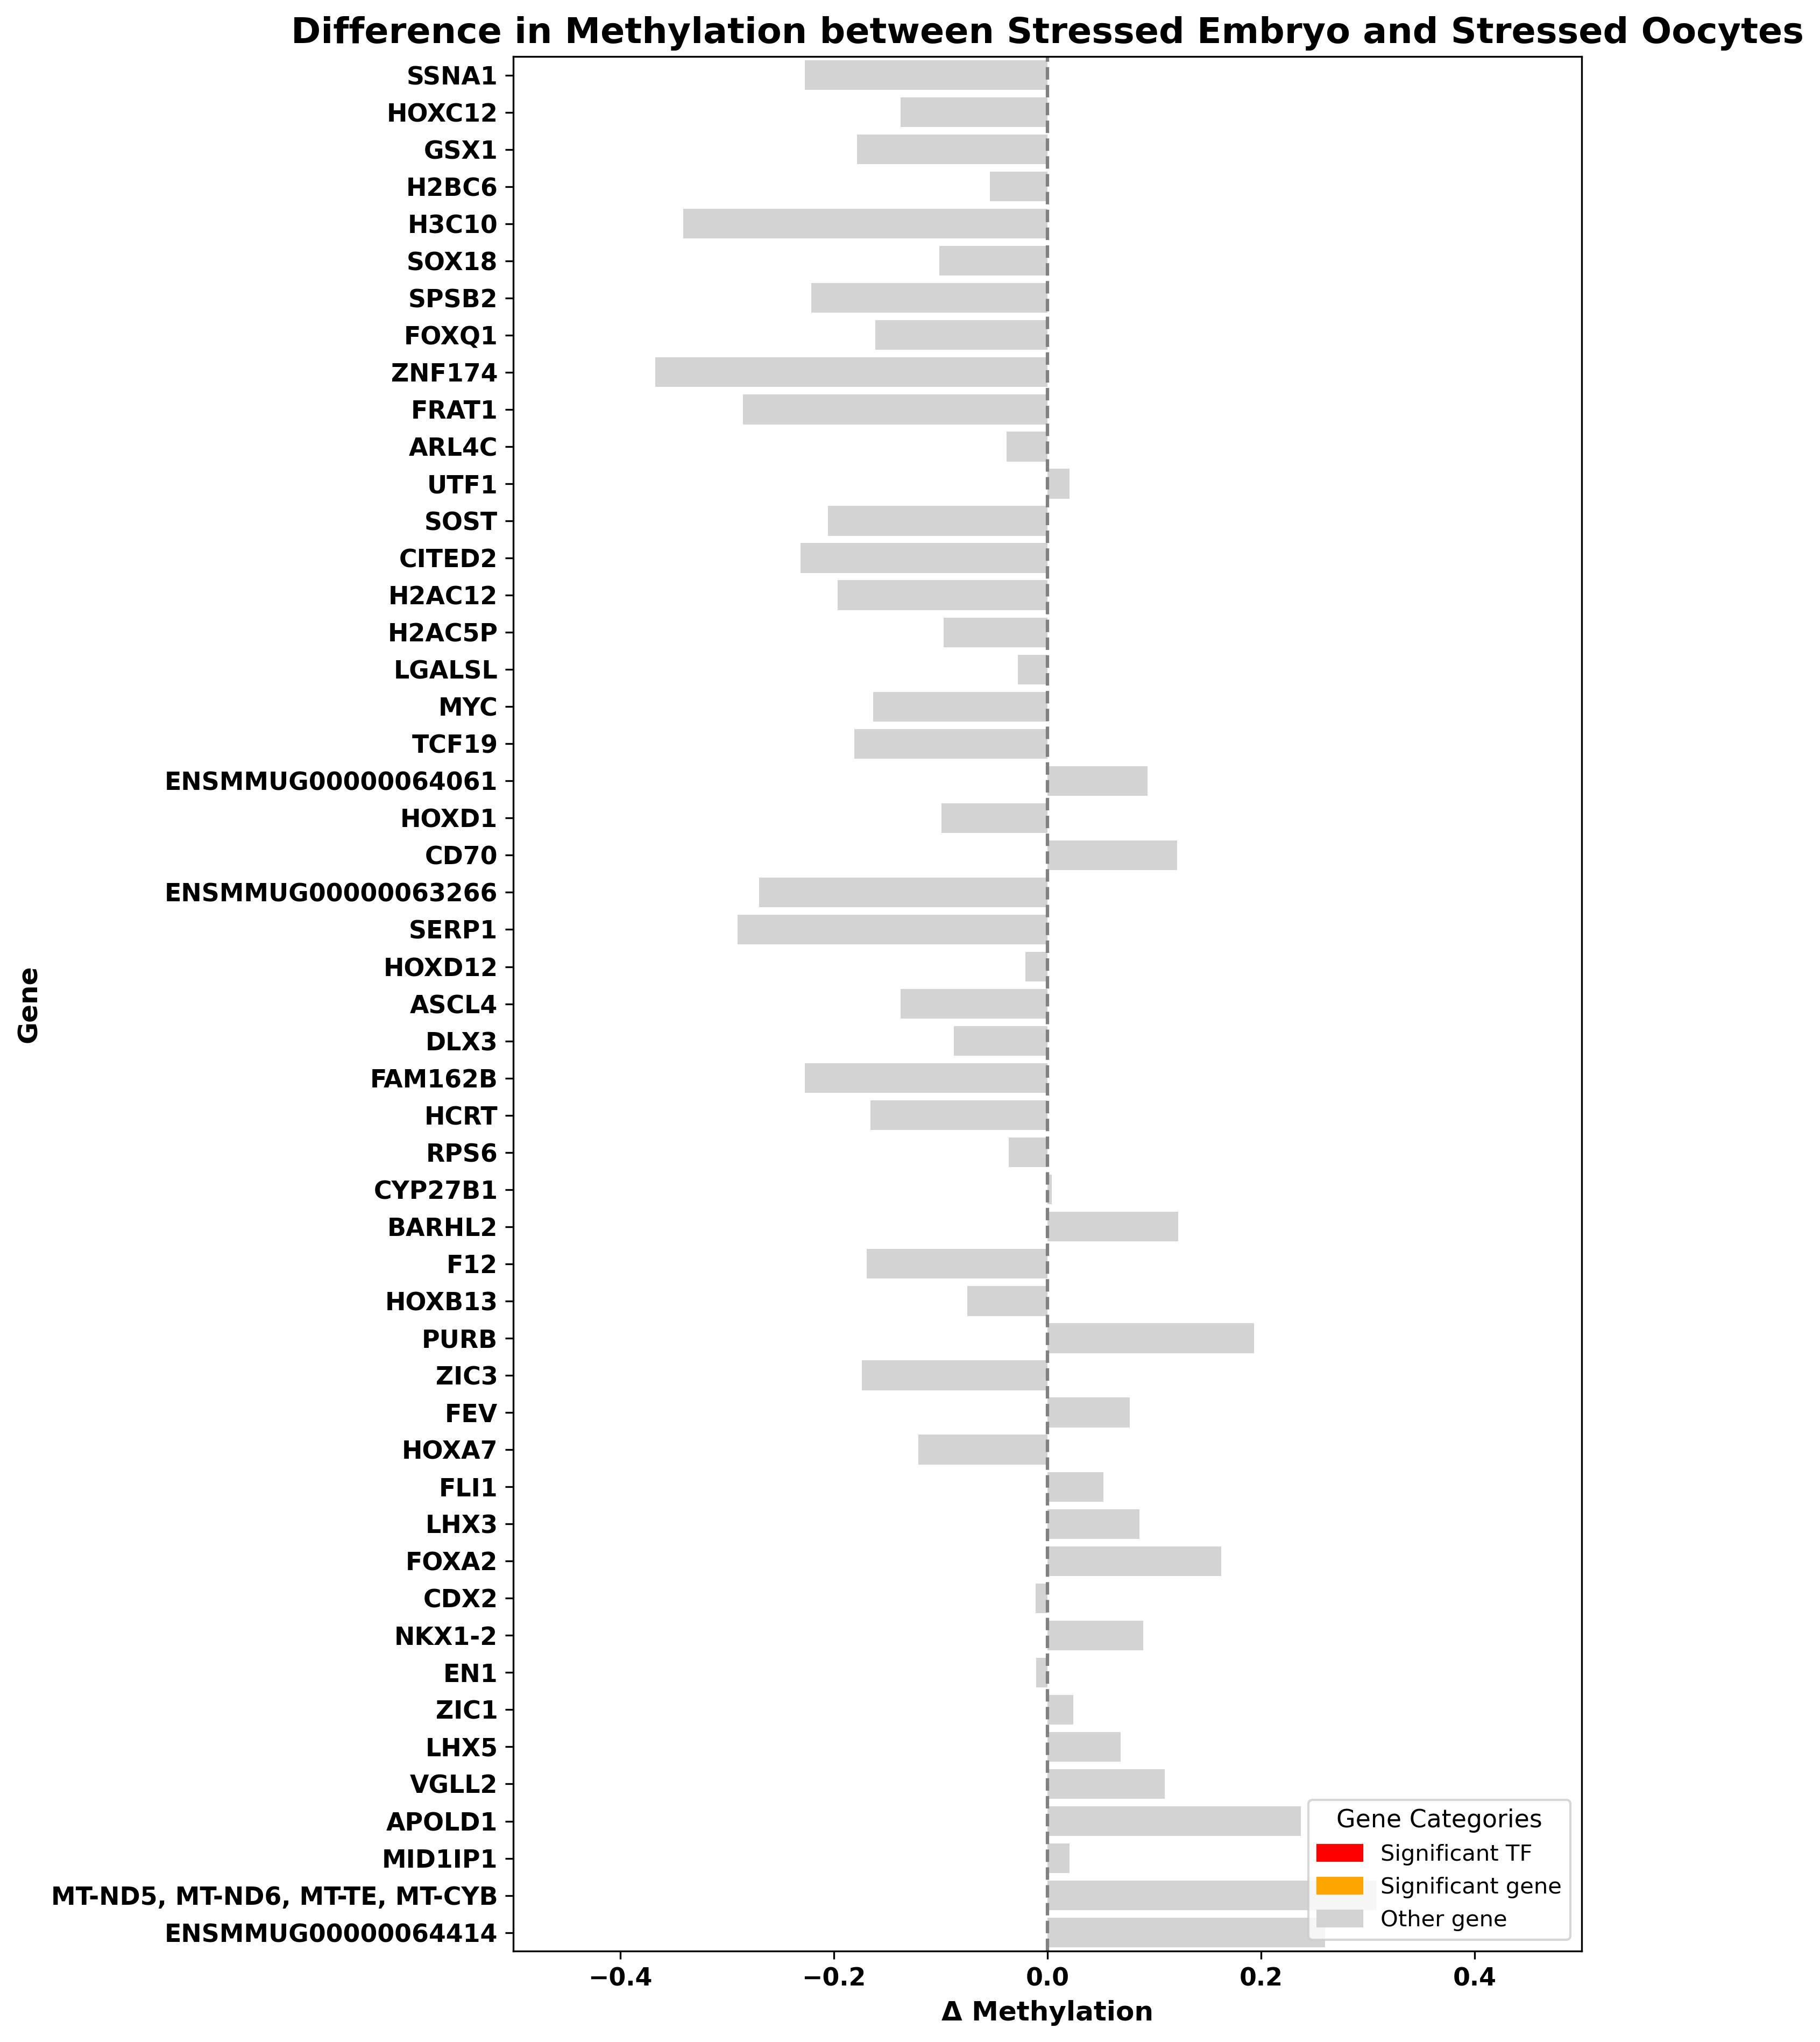

In [16]:
# with pvaue -

# ── Compare stress  Oocytes vs Stressed Embryos – Δ Methylation per Gene ──

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

# ── Step 1: Define transcription factors ──
highlight_tfs = [
    'BARHL2', 'FOXA2', 'SOX18', 'HOXC12', 'ASCL4', 'LHX5', 'EN1', 
    'HOXD12', 'HOXD1', 'FEV', 'LHX3', 'DLX3', 'HOXB13', 'GSX1', 
    'CDX2', 'ZIC1', 'ZNF174', 'PURB', 'HOXA7', 'VGLL2', 'CITED2', 
    'TCF19', 'FOXQ1', 'MYC', 'NKX1-2', 'FLI1', 'UTF1', 'ZIC3'
]

# ── Step 1: Load the gene list ──
genes_df = pd.read_csv("../../alloocytes/results-pooled/mCG_genenames_coords_withlifted.csv", sep=",")
genes_df.columns = ["gene_id", "chr", "start", "end", "genename"]
target_genes = genes_df['gene_id'].dropna().unique()
gene_id_to_name = genes_df.dropna(subset=['genename']).set_index("gene_id")["genename"].to_dict()

# ── Step 2: Filter control oocytes and stressed embryos ──
adata_oocyte_stressed = adataoocyte[adataoocyte.obs['Group'] == 'Stressed'].copy()
adata_embryo_stressed = adataembryo[adataembryo.obs['Group'] == 'Stressed'].copy()

# ── Step 3: Filter to target gene list ──
adata_oocyte_stressed = adata_oocyte_stressed[:, adata_oocyte_stressed.var['gene_id'].isin(target_genes)].copy()
adata_embryo_stressed = adata_embryo_stressed[:, adata_embryo_stressed.var['gene_id'].isin(target_genes)].copy()

# ── Step 4: Align genes by gene_id ──
oocyte_var = adata_oocyte_stressed.var.set_index("gene_id")
embryo_var = adata_embryo_stressed.var.set_index("gene_id")
common_gene_ids = np.intersect1d(oocyte_var.index, embryo_var.index)

adata_oocyte_stressed = adata_oocyte_stressed[:, oocyte_var.loc[common_gene_ids].index]
adata_embryo_stressed = adata_embryo_stressed[:, embryo_var.loc[common_gene_ids].index]

# ── Step 5: Compute mean methylation per gene ──
def mean_meth(adata):
    X = adata.layers['methylation_fraction']
    return np.ravel(X.mean(axis=0).A1 if hasattr(X, "A1") else X.mean(axis=0))

oocyte_means = mean_meth(adata_oocyte_stressed)
embryo_means = mean_meth(adata_embryo_stressed)

# ── Step 6: Build dataframe ──
meth_df = pd.DataFrame({
    'gene_id': common_gene_ids,
    'genename': [gene_id_to_name.get(gid, gid) for gid in common_gene_ids],
    'oocyte_mean': oocyte_means,
    'embryo_mean': embryo_means
})
meth_df['delta'] = meth_df['embryo_mean'] - meth_df['oocyte_mean']

# ── Step X: Flag TFs ──
highlight_tfs_set = set(highlight_tfs)
meth_df['is_tf'] = meth_df['genename'].isin(highlight_tfs_set)

# ── Step 7: Per-gene t-test and FDR correction ──
X_oocyte = adata_oocyte_stressed.layers['methylation_fraction']
X_embryo = adata_embryo_stressed.layers['methylation_fraction']
X_oocyte = X_oocyte.toarray() if hasattr(X_oocyte, 'toarray') else X_oocyte
X_embryo = X_embryo.toarray() if hasattr(X_embryo, 'toarray') else X_embryo

pvals = []
for i in range(X_oocyte.shape[1]):
    oocyte_vals = X_oocyte[:, i]
    embryo_vals = X_embryo[:, i]
    _, pval = ttest_ind(embryo_vals, oocyte_vals, equal_var=False)
    pvals.append(pval)

meth_df['pval'] = pvals
meth_df['fdr'] = multipletests(meth_df['pval'], method='fdr_bh')[1]
meth_df['significant'] = (meth_df['fdr'] < 0.05) & (meth_df['delta'].abs() > 0.05)

# Make sure filtered_df is already in the desired order
gene_order = filtered_df['genename']

# Reorder meth_df according to filtered_df order, after sorting by delta
meth_df = meth_df.sort_values('delta', ascending=False)

# Enforce the filtered_df order on 'gene'
meth_df = meth_df[meth_df['genename'].isin(gene_order)]
meth_df['genename'] = pd.Categorical(meth_df['genename'], categories=gene_order, ordered=True)

meth_df2 = meth_df.sort_values('genename')


# ── Step 8: Save results ──
meth_df2.sort_values('delta', ascending=False, inplace=True)
os.makedirs("figure6/embryo", exist_ok=True)
meth_df2.to_csv("figure6/embryo/stressed_oocytes_vs_stressed_embryos_delta_with_stats.csv", index=False)
meth_df2[meth_df2['significant']].to_csv("figure6/embryo/stressed_oocytes_vs_stressed_embryos_significant_delta_genes.csv", index=False)

# ── Step 9: Plot Δ methylation ──
plt.figure(figsize=(10, max(6, 0.25 * len(meth_df2))))
colors = []
for _, row in meth_df2.iterrows():
    if row['significant'] and row['is_tf']:
        colors.append('red')      # Significant TF
   # elif row['is_tf']:
   #     colors.append('blue')     # Non-significant TF
    elif row['significant']:
        colors.append('orange')   # Significant non-TF
    else:
        colors.append('lightgray')  # Not significant, not TF


sns.barplot(
    data=meth_df2,
    x='delta',
    y='genename',
    palette=colors,
    dodge=False
)



# Create legend handles
legend_patches = [
    mpatches.Patch(color='red', label='Significant TF'),
  #  mpatches.Patch(color='blue', label='TF'),
    mpatches.Patch(color='orange', label='Significant gene'),
    mpatches.Patch(color='lightgray', label='Other gene')
]

plt.legend(handles=legend_patches, title="Gene Categories", fontsize=10, title_fontsize=11, loc='lower right')

plt.axvline(0, linestyle='--', color='gray')
plt.title("Difference in Methylation between Stressed Embryo and Stressed Oocytes", fontsize=16, fontweight='bold')
plt.xlabel("Δ Methylation", fontsize=12, fontweight='bold')
plt.ylabel("Gene", fontsize=12, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xlim(-0.5,0.5)
plt.tight_layout()

# Save figure
os.makedirs("figure6/embryo", exist_ok=True)
plt.savefig("figure6/embryo/stressed_oocytes_vs_stressed_embryos_delta_methylation_barplot_significant.png", dpi=300)
plt.show()


In [17]:
def plot_combined_comparisons(df1, df2, label1, label2, outpath):
    """
    Combine two Δ methylation comparisons into one side-by-side figure.
    """

    fig, axes = plt.subplots(1, 2, figsize=(20, max(6, 0.25*len(df1))), sharey=True)

    # Panel 1 colors
    colors1 = [
        "red" if (row.significant and row.is_tf) else
        "orange" if row.significant else
        "lightgray"
        for _, row in df1.iterrows()
    ]

    sns.barplot(data=df1, x="delta", y="genename", palette=colors1, dodge=False, ax=axes[0])
    axes[0].axvline(0, linestyle="--", color="gray")
    axes[0].set_title(label1, fontsize=16, fontweight="bold")
    axes[0].set_xlabel("Δ Methylation", fontsize=14, fontweight="bold")
    axes[0].set_ylabel("Gene", fontsize=14, fontweight="bold")
    axes[0].set_xlim(-0.5, 0.5)   # ✅ set range
    axes[0].tick_params(axis="y", labelsize=10)  
    for label in axes[0].get_yticklabels():
        label.set_fontweight("bold")   # ✅ bold y-ticks
    axes[0].tick_params(axis="x", labelsize=10, labelrotation=0)

    # Panel 2 colors
    colors2 = [
        "red" if (row.significant and row.is_tf) else
        "orange" if row.significant else
        "lightgray"
        for _, row in df2.iterrows()
    ]

    sns.barplot(data=df2, x="delta", y="genename", palette=colors2, dodge=False, ax=axes[1])
    axes[1].axvline(0, linestyle="--", color="gray")
    axes[1].set_title(label2, fontsize=16, fontweight="bold")
    axes[1].set_xlabel("Δ Methylation", fontsize=14, fontweight="bold")
    axes[1].set_ylabel("")  
    axes[1].set_xlim(-0.5, 0.5)   # ✅ set range
    axes[1].tick_params(axis="y", labelsize=14)
   
    for ax in axes:
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight("bold")
    # Legend

        # Create legend handles
        legend_patches = [
            mpatches.Patch(color='red', label='Significant TFs'),
           # mpatches.Patch(color='blue', label='TF (not significant)'),
            mpatches.Patch(color='orange', label='Significant non-TFs'),
            mpatches.Patch(color='lightgray', label='Non-significant genes')
        ]

    fig.legend(handles=legend_patches, title="Gene Categories", loc="lower center", ncol=3)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(outpath, dpi=300)
    plt.show()


/tmp/ipykernel_2494048/3042939670.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x="delta", y="genename", palette=colors1, dodge=False, ax=axes[0])
/tmp/ipykernel_2494048/3042939670.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x="delta", y="genename", palette=colors2, dodge=False, ax=axes[1])


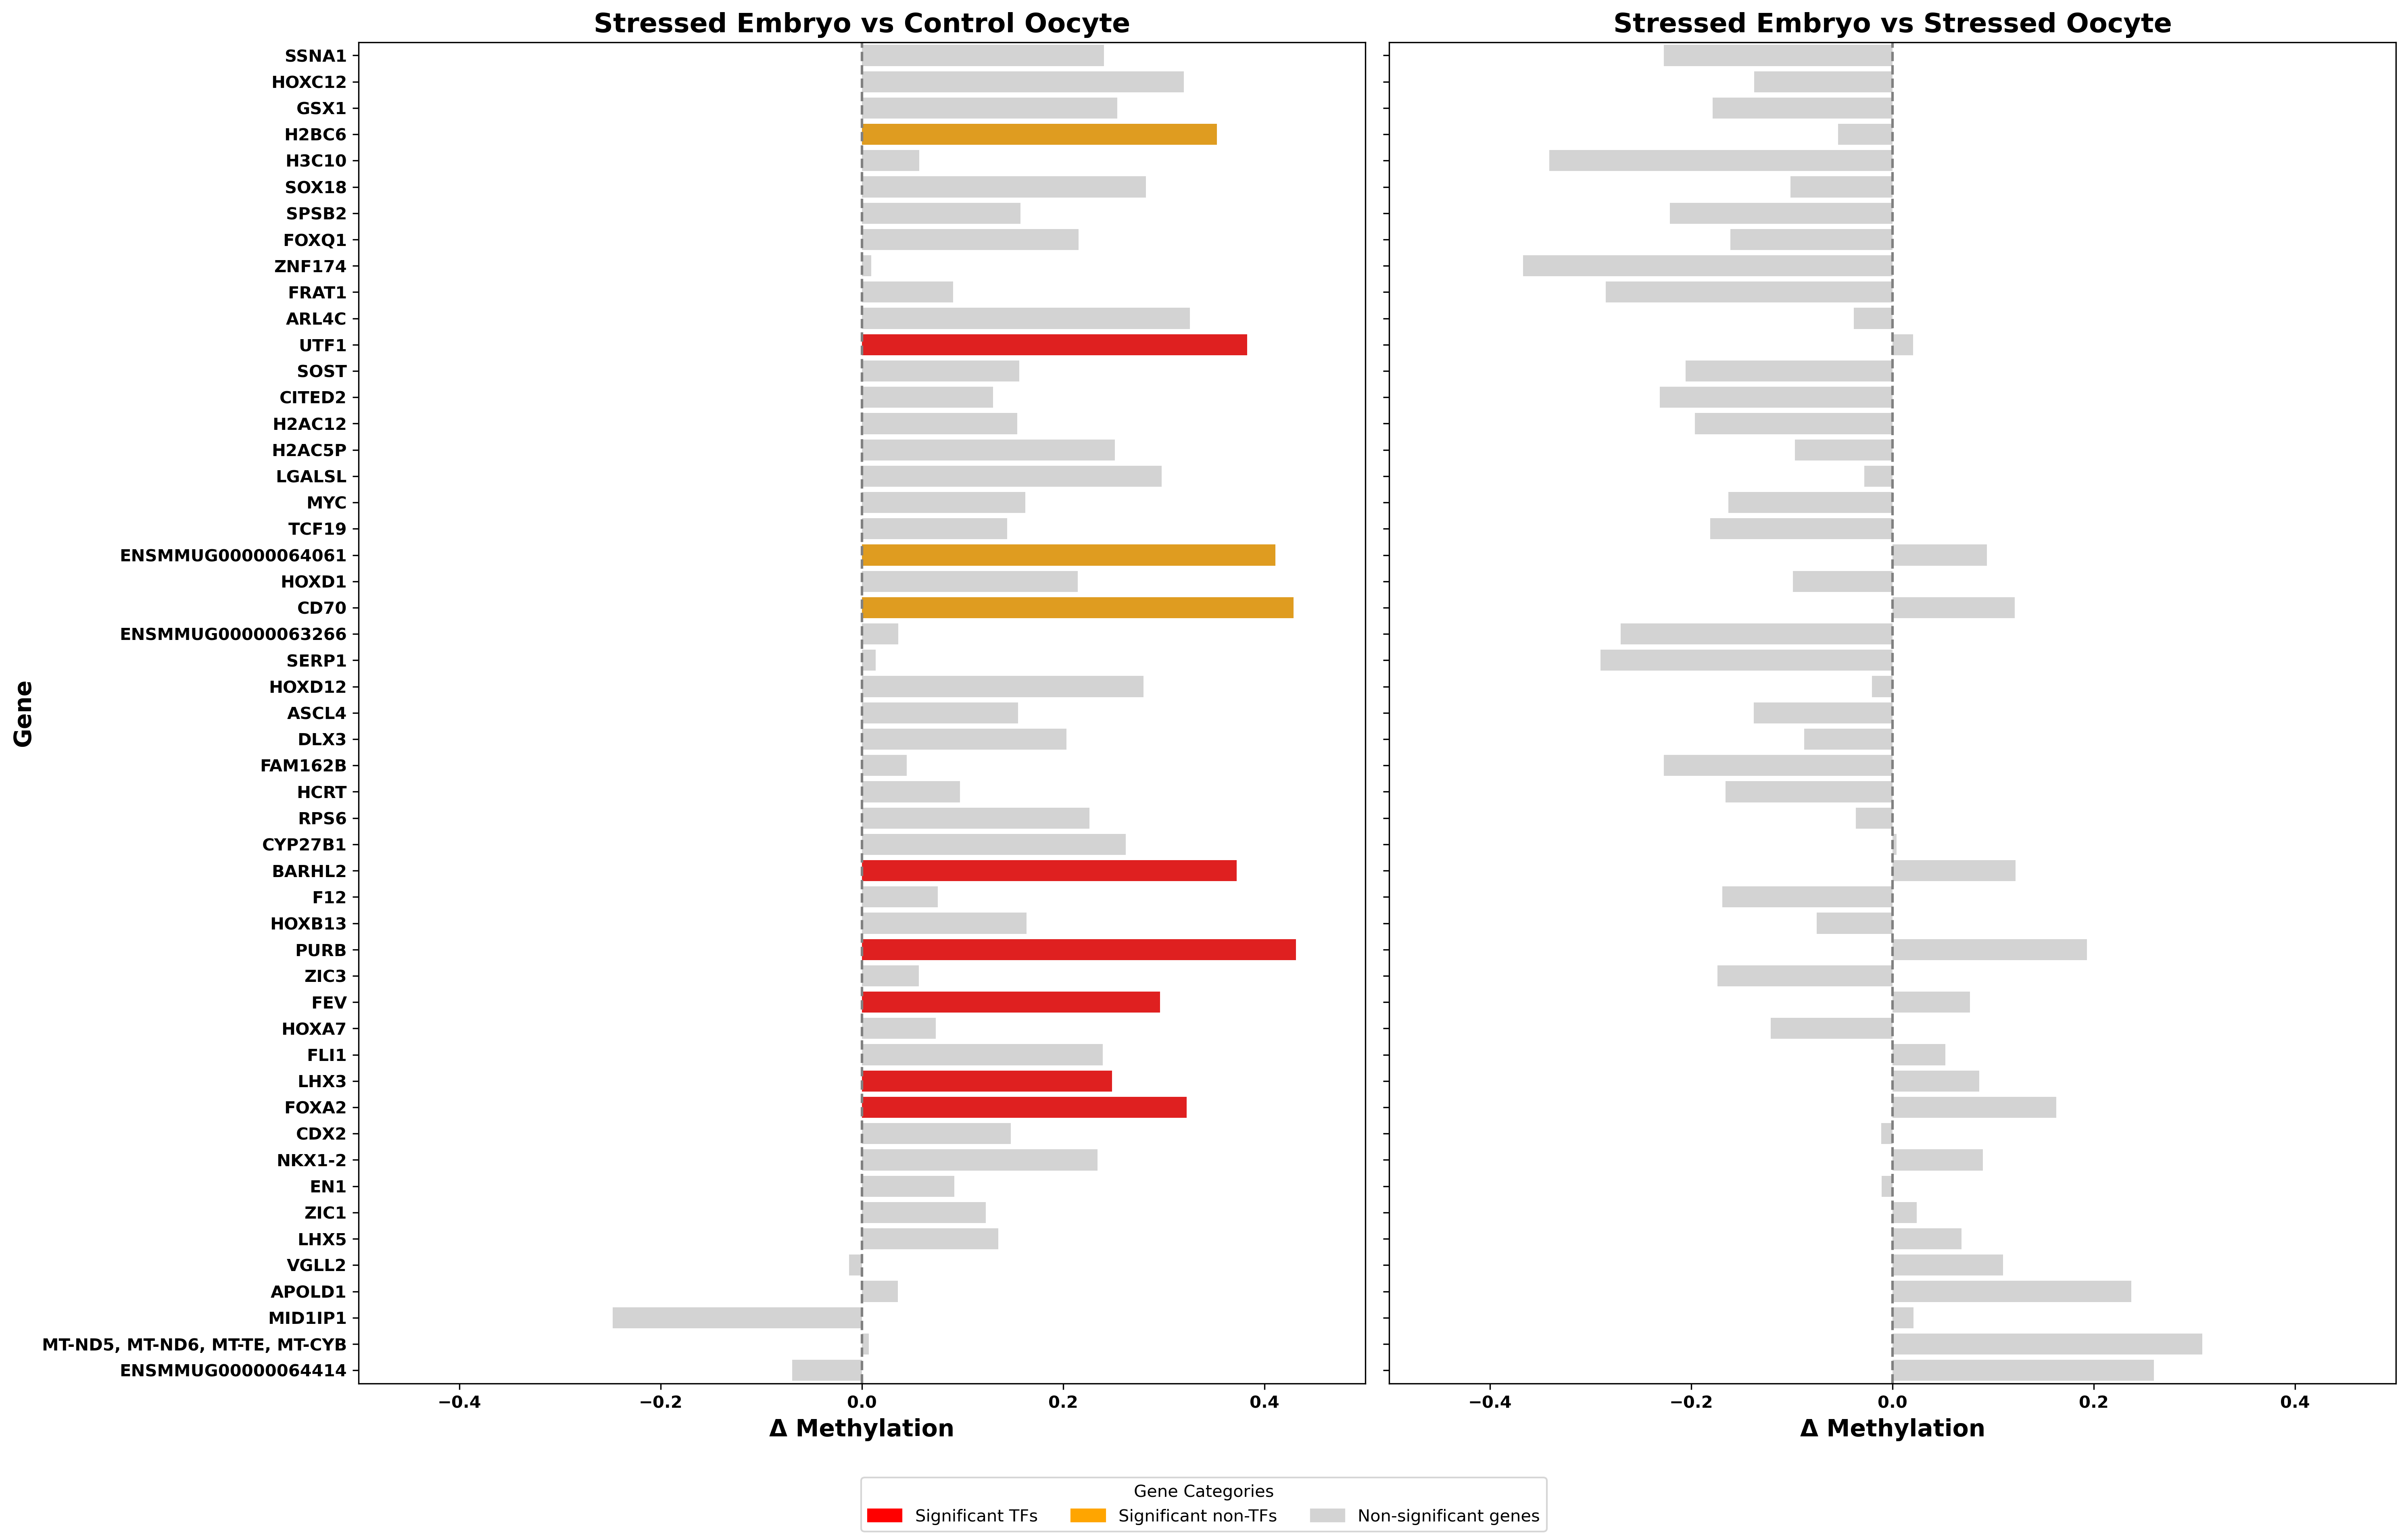

In [18]:
plot_combined_comparisons(
    df1=meth_df1,
    df2=meth_df2,
    label1="Stressed Embryo vs Control Oocyte",
    label2="Stressed Embryo vs Stressed Oocyte",
    outpath="figure6/embryo/combined_EO_fig6.pdf"
)


In [ ]:
# editable pdf

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# --- Global vector export settings ---
matplotlib.rcParams['pdf.fonttype'] = 42      # Embed TrueType fonts (editable text)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300       # Affects preview only, not vector quality
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # Keep all path points, no simplification
matplotlib.rcParams['svg.fonttype'] = 'none'  # Keeps text as editable text in SVG too

def plot_combined_comparisons(df1, df2, label1, label2, outpath):
    """
    Combine two Δ methylation comparisons into one side-by-side figure (vector-editable).
    """

    fig, axes = plt.subplots(1, 2, figsize=(20, max(6, 0.25*len(df1))), sharey=True)

    # Panel 1 colors
    colors1 = [
        "red" if (row.significant and row.is_tf) else
        "orange" if row.significant else
        "lightgray"
        for _, row in df1.iterrows()
    ]
    sns.barplot(data=df1, x="delta", y="genename", palette=colors1, dodge=False, ax=axes[0])
    axes[0].axvline(0, linestyle="--", color="gray")
    axes[0].set_title(label1, fontsize=16, fontweight="bold")
    axes[0].set_xlabel("Δ Methylation", fontsize=14, fontweight="bold")
    axes[0].set_ylabel("Gene", fontsize=14, fontweight="bold")
    axes[0].set_xlim(-0.5, 0.5)
    axes[0].tick_params(axis="y", labelsize=10)
    for label in axes[0].get_yticklabels():
        label.set_fontweight("bold")
    axes[0].tick_params(axis="x", labelsize=10)

    # Panel 2 colors
    colors2 = [
        "red" if (row.significant and row.is_tf) else
        "orange" if row.significant else
        "lightgray"
        for _, row in df2.iterrows()
    ]
    sns.barplot(data=df2, x="delta", y="genename", palette=colors2, dodge=False, ax=axes[1])
    axes[1].axvline(0, linestyle="--", color="gray")
    axes[1].set_title(label2, fontsize=16, fontweight="bold")
    axes[1].set_xlabel("Δ Methylation", fontsize=14, fontweight="bold")
    axes[1].set_ylabel("")
    axes[1].set_xlim(-0.5, 0.5)
    axes[1].tick_params(axis="y", labelsize=14)

    for ax in axes:
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight("bold")

    # Legend
    legend_patches = [
        mpatches.Patch(color='red', label='Significant TFs'),
        mpatches.Patch(color='orange', label='Significant non-TFs'),
        mpatches.Patch(color='lightgray', label='Non-significant genes')
    ]
    fig.legend(handles=legend_patches, title="Gene Categories", loc="lower center", ncol=3)

    plt.tight_layout(rect=[0, 0.05, 1, 1])

    # --- Save as fully vector PDF ---
    plt.savefig(outpath, format='pdf', bbox_inches='tight')
    plt.show()

# Example usage
plot_combined_comparisons(
    df1=meth_df1,
    df2=meth_df2,
    label1="Stressed Embryo vs Control Oocyte",
    label2="Stressed Embryo vs Stressed Oocyte",
    outpath="figure6/embryo/combined_new_fig6.pdf"
)


/tmp/ipykernel_2494048/4246402228.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x="delta", y="genename", palette=colors1, dodge=False, ax=axes[0])
/tmp/ipykernel_2494048/4246402228.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x="delta", y="genename", palette=colors2, dodge=False, ax=axes[1])


In [76]:
# make df from adata
def adata_to_long_df(adata, stage_name):
    X = adata.layers['methylation_fraction']
    X = X.toarray() if hasattr(X, "toarray") else X

    df_long = pd.DataFrame(X, columns=adata.var['gene_id'])
    df_long["AnimalID"] = adata.obs["AnimalID"].values
    df_long["Group"] = adata.obs["Group"].values
    df_long["Stage"] = stage_name

    return df_long.melt(
        id_vars=["AnimalID", "Group", "Stage"],
        var_name="gene", value_name="beta"
    )

# Build oocyte + embryo data
df_oocyte = adata_to_long_df(adataoocyte, "Oocyte")
df_embryo = adata_to_long_df(adataembryo, "Embryo")

# Combine into one df
df = pd.concat([df_oocyte, df_embryo], ignore_index=True)

# Map gene symbols & TFs
df["genename"] = df["gene"].map(gene_id_to_name).fillna(df["gene"])
df["is_tf"] = df["genename"].isin(highlight_tfs)


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import numpy as np
import os

def per_animal_embryo_vs_oocyte_combined(df, outdir="figure6//per_animal_combined"):
    """
    Create one subplot per animal comparing Embryo vs Oocyte Δ methylation.
    Uses paired t-tests (ttest_rel) with FDR correction within each animal.
    """
    os.makedirs(outdir, exist_ok=True)

    # keep only animals with both stages
    valid_animals = []
    for animal in df["AnimalID"].unique():
        stages = df.loc[df["AnimalID"] == animal, "Stage"].unique()
        if {"Oocyte", "Embryo"} <= set(stages):
            valid_animals.append(animal)

    n_animals = len(valid_animals)
    if n_animals == 0:
        print("⚠️ No animals with both Oocyte and Embryo samples.")
        return

    # subplot grid
    ncols = 4
    nrows = int(np.ceil(n_animals / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(20, 5 * nrows),
                             squeeze=False)
    axes = axes.ravel()

    results = []

    for idx, animal in enumerate(valid_animals):
        ax = axes[idx]
        df_animal = df[df["AnimalID"] == animal]

        group = df_animal["Group"].unique()
        group = group[0] if len(group) == 1 else "Mixed"

        # mean methylation per gene & stage
        mean_df = df_animal.groupby(["gene", "Stage"])["beta"].mean().unstack()
        if "Oocyte" not in mean_df.columns or "Embryo" not in mean_df.columns:
            ax.set_axis_off()
            continue

        mean_df["delta"] = mean_df["Embryo"] - mean_df["Oocyte"]
        mean_df = mean_df.reset_index()
        mean_df["genename"] = mean_df["gene"].map(gene_id_to_name).fillna(mean_df["gene"])
        mean_df["is_tf"] = mean_df["genename"].isin(highlight_tfs)

        # paired t-tests per gene
        pvals = []
        for gene in mean_df["gene"]:
            # faster t-tests by avoiding .query()
            oocyte_vals = df_animal[(df_animal["gene"] == gene) & (df_animal["Stage"] == "Oocyte")]["beta"].values
            embryo_vals = df_animal[(df_animal["gene"] == gene) & (df_animal["Stage"] == "Embryo")]["beta"].values
            min_len = min(len(oocyte_vals), len(embryo_vals))
            if min_len > 1:
                _, pval = ttest_rel(embryo_vals[:min_len], oocyte_vals[:min_len])
            else:
                pval = 1.0
            pvals.append(pval)

        mean_df["pval"] = pvals
        mean_df["fdr"] = multipletests(mean_df["pval"], method="fdr_bh")[1]
        mean_df["significant"] = (mean_df["fdr"] < 0.1) & (mean_df["delta"].abs() > 0.05)

        results.append(mean_df)

        # colors
        colors = [
            "red" if (row["significant"] and row["is_tf"]) else
            "orange" if row["significant"] else
            "lightgray"
            for _, row in mean_df.iterrows()
        ]

        # plot per-animal barplot
        sns.barplot(data=mean_df, x="delta", y="genename", palette=colors, dodge=False, ax=ax,  ci=None)
        ax.axvline(0, linestyle="--", color="gray")
        ax.set_title(f"Animal {animal} ({group})", fontsize=12, fontweight="bold")
        ax.set_xlabel("Δ Methylation", fontsize=11, fontweight="bold")
        ax.set_ylabel("Gene", fontsize=11, fontweight="bold")

        # ✅ keep consistent x-axis across animals
        ax.set_xlim(-1, 1)

        # ✅ bold ticks
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight("bold")

    # turn off unused axes
    for j in range(idx + 1, nrows * ncols):
        axes[j].set_axis_off()

    # shared legend
    legend_patches = [
        mpatches.Patch(color="red", label="Significant TF"),
        mpatches.Patch(color="orange", label="Significant gene"),
        mpatches.Patch(color="lightgray", label="Other gene")
    ]
    fig.legend(handles=legend_patches, title="Gene Categories", loc="lower center", ncol=3)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(f"{outdir}/all_animals_embryo_vs_oocyte_barplots.png", dpi=300)
    plt.show()

    return results


In [ ]:
per_animal_embryo_vs_oocyte_combined(df)

/tmp/ipykernel_4026273/2202873649.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_df, x="delta", y="genename", palette=colors, dodge=False, ax=ax,  ci=None)
/tmp/ipykernel_4026273/2202873649.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_df, x="delta", y="genename", palette=colors, dodge=False, ax=ax,  ci=None)
/tmp/ipykernel_4026273/2202873649.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_df, x="delta", y="genename", palette=colors, dodge=False, ax=ax,  ci=None)
/tmp/ipykernel_4026273/2202873649.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the s

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import numpy as np
import os

def per_animal_embryo_vs_oocyte_combined(df, outdir="figure6/per_animal_combined"):
    """
    Create one subplot per animal comparing Embryo vs Oocyte Δ methylation.
    Uses paired t-tests (ttest_rel) with FDR correction within each animal.
    """
    os.makedirs(outdir, exist_ok=True)

    # keep only animals with both stages
    valid_animals = []
    for animal in df["AnimalID"].unique():
        stages = df.loc[df["AnimalID"] == animal, "Stage"].unique()
        if {"Oocyte", "Embryo"} <= set(stages):
            valid_animals.append(animal)

    n_animals = len(valid_animals)
    if n_animals == 0:
        print("⚠️ No animals with both Oocyte and Embryo samples.")
        return

    # subplot grid
    ncols = 4
    nrows = int(np.ceil(n_animals / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(20, 5 * nrows),
                             squeeze=False)
    axes = axes.ravel()

    results = []

    for idx, animal in enumerate(valid_animals):
        ax = axes[idx]
        df_animal = df[df["AnimalID"] == animal]

        group = df_animal["Group"].unique()
        group = group[0] if len(group) == 1 else "Mixed"

        # mean methylation per gene & stage
        mean_df = df_animal.groupby(["gene", "Stage"])["beta"].mean().unstack()
        if "Oocyte" not in mean_df.columns or "Embryo" not in mean_df.columns:
            ax.set_axis_off()
            continue

        mean_df["delta"] = mean_df["Embryo"] - mean_df["Oocyte"]
        mean_df = mean_df.reset_index()
        mean_df["genename"] = mean_df["gene"].map(gene_id_to_name).fillna(mean_df["gene"])
        mean_df["is_tf"] = mean_df["genename"].isin(highlight_tfs)

        # paired t-tests per gene
        pvals = []
        for gene in mean_df["gene"]:
            oocyte_vals = df_animal.query("gene == @gene and Stage == 'Oocyte'")["beta"].values
            embryo_vals = df_animal.query("gene == @gene and Stage == 'Embryo'")["beta"].values
            min_len = min(len(oocyte_vals), len(embryo_vals))
            if min_len > 1:
                _, pval = ttest_rel(embryo_vals[:min_len], oocyte_vals[:min_len])
            else:
                pval = 1.0
            pvals.append(pval)

        mean_df["pval"] = pvals
        mean_df["fdr"] = multipletests(mean_df["pval"], method="fdr_bh")[1]
        mean_df["significant"] = (mean_df["fdr"] < 0.1) & (mean_df["delta"].abs() > 0.05)

        results.append(mean_df)

        # colors
        colors = [
            "red" if (row["significant"] and row["is_tf"]) else
            "orange" if row["significant"] else
            "lightgray"
            for _, row in mean_df.iterrows()
        ]

        group = df_animal["Group"].unique()
        group = group[0] if len(group) == 1 else "Mixed"

        # plot per-animal barplot
        sns.barplot(data=mean_df, x="delta", y="genename", palette=colors, dodge=False, ax=ax)
        ax.axvline(0, linestyle="--", color="gray")
        ax.set_title(f"Animal {animal} ({group})", fontsize=12, fontweight="bold")  # ✅ group in title
        ax.set_xlabel("Δ Methylation", fontsize=11, fontweight="bold")
        ax.set_ylabel("Gene", fontsize=11, fontweight="bold")

        # ✅ keep consistent x-axis across animals
        ax.set_xlim(-1, 1)

        # ✅ bold ticks
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight("bold")

    # turn off unused axes
    for j in range(idx + 1, nrows * ncols):
        axes[j].set_axis_off()

    # shared legend
    legend_patches = [
        mpatches.Patch(color="red", label="Significant TF"),
        mpatches.Patch(color="orange", label="Significant gene"),
        mpatches.Patch(color="lightgray", label="Other gene")
    ]
    fig.legend(handles=legend_patches, title="Gene Categories", loc="lower center", ncol=3)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(f"{outdir}/all_animals_embryo_vs_oocyte_barplots.png", dpi=300)
    plt.show()

    return results


In [ ]:
per_animal_embryo_vs_oocyte_combined(df)